# NumPy Basics: Arrays and Vectorized Computation

In [1]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
%load_ext autotime

time: 247 µs (started: 2021-07-20 20:30:43 +09:00)


## 4.3 배열을 이용한 배열지향 프로그래밍

배열을 이용하면 반복문을 작성하지 않고 배열 연산을 통해서 많은 종류의 데이터 처리 작업을 할 수 있다.  
-> runtime error 방지  

divmod의 벡터화 : modf  
벡터화 : 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법  

+ np.meshgrid  
    : 2개 일차원 배열을 받아서 가능한 모든 (x, y) 2차원 배열을 반환

In [3]:
points = np.arange(-5, 5, 0.01) # -5부터 5직전 까지 0.01씩 증가하는 값들의 배열

time: 305 µs (started: 2021-07-20 20:30:43 +09:00)


In [4]:
points # 길지만 1차원 배열 한개

array([-5.  , -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92,
       -4.91, -4.9 , -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83,
       -4.82, -4.81, -4.8 , -4.79, -4.78, -4.77, -4.76, -4.75, -4.74,
       -4.73, -4.72, -4.71, -4.7 , -4.69, -4.68, -4.67, -4.66, -4.65,
       -4.64, -4.63, -4.62, -4.61, -4.6 , -4.59, -4.58, -4.57, -4.56,
       -4.55, -4.54, -4.53, -4.52, -4.51, -4.5 , -4.49, -4.48, -4.47,
       -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4 , -4.39, -4.38,
       -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3 , -4.29,
       -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2 ,
       -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11,
       -4.1 , -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02,
       -4.01, -4.  , -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93,
       -3.92, -3.91, -3.9 , -3.89, -3.88, -3.87, -3.86, -3.85, -3.84,
       -3.83, -3.82, -3.81, -3.8 , -3.79, -3.78, -3.77, -3.76, -3.75,
       -3.74, -3.73,

time: 9.85 ms (started: 2021-07-20 20:30:43 +09:00)


In [5]:
ttl = np.meshgrid(points, points) # 1차원 배열 2개 -> 2차원 배열 2개
ttl 

[array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])]

time: 5.31 ms (started: 2021-07-20 20:30:43 +09:00)


In [6]:
xs, ys = np.meshgrid(points, points) 
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

time: 5.93 ms (started: 2021-07-20 20:30:43 +09:00)


In [7]:
z = np.array(xs ** 2 + ys ** 2) # 제곱값끼리 더하기
z

array([[50.    , 49.9001, 49.8004, ..., 49.7009, 49.8004, 49.9001],
       [49.9001, 49.8002, 49.7005, ..., 49.601 , 49.7005, 49.8002],
       [49.8004, 49.7005, 49.6008, ..., 49.5013, 49.6008, 49.7005],
       ...,
       [49.7009, 49.601 , 49.5013, ..., 49.4018, 49.5013, 49.601 ],
       [49.8004, 49.7005, 49.6008, ..., 49.5013, 49.6008, 49.7005],
       [49.9001, 49.8002, 49.7005, ..., 49.601 , 49.7005, 49.8002]])

time: 10.3 ms (started: 2021-07-20 20:30:43 +09:00)


In [8]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

time: 8.55 ms (started: 2021-07-20 20:30:43 +09:00)


**matplotlib**을 이용해서 2차원배열을 시각화  

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

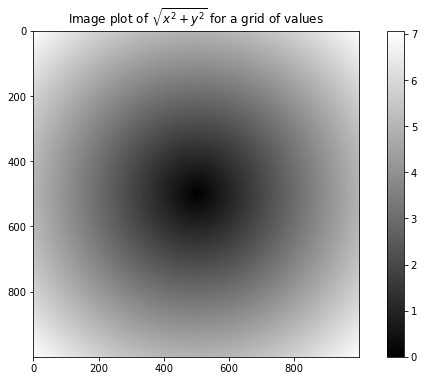

time: 420 ms (started: 2021-07-20 20:30:43 +09:00)


In [9]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar() # 그래프 이미지 생성
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [10]:
plt.draw()

<Figure size 720x432 with 0 Axes>

time: 2.29 ms (started: 2021-07-20 20:30:43 +09:00)


In [11]:
plt.close('all')

time: 313 µs (started: 2021-07-20 20:30:43 +09:00)


### 4.3.1 배열 연산으로 조건절 표현하기

+ numpy.where  
    : 'x if 조건 else y'의 벡터화 버전

In [12]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

time: 431 µs (started: 2021-07-20 20:30:43 +09:00)


In [13]:
result = [(x if c else y) # 불리언이 True이면 x, 아니면 y
          for x, y, c in zip(xarr, yarr, cond)] # 위의 변수가 어떤 배열에 해당되는지 설명
result

[1.1, 2.2, 1.3, 1.4, 2.5]

time: 2.26 ms (started: 2021-07-20 20:30:43 +09:00)


In [14]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

time: 1.69 ms (started: 2021-07-20 20:30:43 +09:00)


약간이지만 where를 쓴 코드의 runtime이 더 작다.  
-> np.where를 사용하면 간결하지만 빠른 코드를 짤 수 있다.

In [15]:
arr = np.random.randn(4, 4)
arr

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

time: 1.73 ms (started: 2021-07-20 20:30:43 +09:00)


In [16]:
arr > 0

array([[False,  True, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

time: 1.23 ms (started: 2021-07-20 20:30:43 +09:00)


In [17]:
np.where(arr > 0, 2, -2) # 양수인 데이터는 2로 나머지는 -2로 바꿀 수 있다.

array([[-2,  2, -2, -2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2, -2],
       [ 2,  2,  2,  2]])

time: 1.4 ms (started: 2021-07-20 20:30:43 +09:00)


In [18]:
np.where(arr > 0, 2, arr) # 양수는 2로, 나머지는 원래 arr에 있던 값

array([[-0.2047,  2.    , -0.5194, -0.5557],
       [ 2.    ,  2.    ,  2.    ,  2.    ],
       [ 2.    ,  2.    ,  2.    , -1.2962],
       [ 2.    ,  2.    ,  2.    ,  2.    ]])

time: 1.53 ms (started: 2021-07-20 20:30:43 +09:00)


### 4.3.2 수학 메서드와 통계 메서드

통계를 계산하는 수학 함수 사용 가능  
+ sum
+ mean
+ std

In [19]:
arr = np.random.randint(10, size=(5, 4)) # 계산을 쉽게 확인하기 위해서 한자리 수 랜덤한 정수만 사용 [0,10)
arr

array([[3, 5, 7, 3],
       [1, 5, 2, 5],
       [3, 8, 5, 2],
       [5, 3, 0, 6],
       [8, 0, 5, 6]])

time: 1.58 ms (started: 2021-07-20 20:30:43 +09:00)


In [20]:
arr.mean() # 전체 평균

4.1

time: 1.24 ms (started: 2021-07-20 20:30:43 +09:00)


In [21]:
np.mean(arr) # 위와 동일

4.1

time: 1.2 ms (started: 2021-07-20 20:30:43 +09:00)


In [22]:
arr.sum() # 배열 전체의 합

82

time: 1.47 ms (started: 2021-07-20 20:30:43 +09:00)


axis인자를 통해서 해당 axis만 따로 계산 가능  

In [23]:
arr.mean(axis=0) 

array([4. , 4.2, 3.8, 4.4])

time: 1.46 ms (started: 2021-07-20 20:30:43 +09:00)


In [24]:
arr.mean(axis=1)

array([4.5 , 3.25, 4.5 , 3.5 , 4.75])

time: 1.53 ms (started: 2021-07-20 20:30:43 +09:00)


In [25]:
arr.sum(axis=0) 

array([20, 21, 19, 22])

time: 1.22 ms (started: 2021-07-20 20:30:43 +09:00)


In [26]:
arr.sum(axis=1) 

array([18, 13, 18, 14, 19])

time: 1.23 ms (started: 2021-07-20 20:30:43 +09:00)


+ cumsum  
    : 각 원소의 누적합

In [27]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

time: 1.47 ms (started: 2021-07-20 20:30:43 +09:00)


In [28]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

time: 2.05 ms (started: 2021-07-20 20:30:43 +09:00)


In [29]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

time: 1.34 ms (started: 2021-07-20 20:30:43 +09:00)


In [30]:
arr.cumsum(axis=1) 

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

time: 1.44 ms (started: 2021-07-20 20:30:43 +09:00)


+ cumprod  
    : 각 원소의 누적곱

In [31]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

time: 2.22 ms (started: 2021-07-20 20:30:43 +09:00)


### 4.3.3 불리언 배열을 위한 메서드

In [53]:
arr = np.random.randn(100)
arr

array([ 0.5113,  1.5336,  0.4376, -1.2613,  1.751 , -1.0211,  0.9364,
       -0.4537,  0.2177,  0.7508,  1.0939,  1.1566,  0.0941,  1.1693,
        0.7452, -2.3027,  1.0721,  0.2188,  0.4256,  0.0073, -0.2135,
       -1.0571, -0.5407,  0.9162,  0.6352, -0.5998, -2.1722, -1.374 ,
       -1.1538,  0.6192,  0.4512, -0.3166, -1.0313,  1.5534,  0.0449,
       -0.6655, -1.2136, -0.4472, -0.0748, -0.4967, -1.2631, -0.3002,
       -0.2316, -1.8743, -0.1555, -2.2136,  0.1037, -1.1056, -2.7529,
       -0.1945, -1.0048, -0.9082,  0.2344, -0.0422, -1.4119, -0.8825,
        0.9486, -0.5301, -1.0202,  0.545 ,  0.6541,  2.3015, -0.3123,
       -0.0174,  0.5043, -2.0312,  0.997 ,  0.8686,  0.415 ,  1.0943,
       -0.3662, -0.1493,  0.6711,  0.1318,  1.051 ,  0.1529,  0.1966,
        0.4825, -0.0637, -0.6296,  1.4566, -0.8677, -1.2708,  0.2744,
        0.8236,  1.2129, -1.4257,  0.6592,  0.1121, -0.3111,  0.3247,
       -0.2768, -0.8314,  0.931 ,  0.07  ,  0.3315, -0.6231,  0.4396,
       -0.9022, -0.4

time: 2.17 ms (started: 2021-07-20 20:53:00 +09:00)


In [54]:
arr > 0

array([ True,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False])

time: 1.51 ms (started: 2021-07-20 20:53:00 +09:00)


In [55]:
(arr > 0).sum() # 양수 원소의 개수

50

time: 1.58 ms (started: 2021-07-20 20:53:00 +09:00)


In [34]:
bools = np.array([False, False, True, False])
bools.any() # 하나 이상이 True인지

True

time: 1.34 ms (started: 2021-07-20 20:30:43 +09:00)


In [35]:
bools.all() # 전체가 True인지

False

time: 1.17 ms (started: 2021-07-20 20:30:43 +09:00)


### 4.3.4 정렬

In [36]:
arr = np.random.randn(6)
arr

array([ 0.6472,  0.4282, -0.0737,  0.3866,  1.5094,  0.6141])

time: 1.52 ms (started: 2021-07-20 20:30:43 +09:00)


In [37]:
arr.sort()

time: 348 µs (started: 2021-07-20 20:30:43 +09:00)


np.sort는 배열을 직접 변경하지 않고   
정렬된 결과를 가지고 있는 복사본을 반환  

In [38]:
arr # 정렬된 채로 변경

array([-0.0737,  0.3866,  0.4282,  0.6141,  0.6472,  1.5094])

time: 1.32 ms (started: 2021-07-20 20:30:43 +09:00)


In [39]:
arr = np.random.randn(5, 3) # 다차원 배열
arr

array([[ 0.8878, -0.7871,  0.8649],
       [-1.563 ,  0.2215, -0.2053],
       [-0.2485,  0.1294,  2.5149],
       [ 0.4767,  2.2985, -1.0485],
       [ 0.9674, -0.5461, -0.1405]])

time: 2.2 ms (started: 2021-07-20 20:30:43 +09:00)


In [40]:
arr.sort(1) # axis = 1 -> 3 -> 3개를 배열한다

time: 302 µs (started: 2021-07-20 20:30:43 +09:00)


In [41]:
arr

array([[-0.7871,  0.8649,  0.8878],
       [-1.563 , -0.2053,  0.2215],
       [-0.2485,  0.1294,  2.5149],
       [-1.0485,  0.4767,  2.2985],
       [-0.5461, -0.1405,  0.9674]])

time: 1.4 ms (started: 2021-07-20 20:30:43 +09:00)


In [42]:
large_arr = np.random.randn(1000)
large_arr

array([-1.5141,  0.7347,  0.1821, -1.0106,  0.4719,  1.4721, -0.0179,
       -0.4713,  1.1247, -0.261 , -0.32  ,  0.039 , -0.14  , -1.4797,
       -0.11  , -0.7976, -0.6012,  0.3288,  0.5929,  1.5791, -0.2048,
        2.4551,  1.5574, -0.7809, -0.9233, -0.0465, -0.2899, -0.5907,
       -1.8779, -0.522 , -0.8708, -1.3825, -2.5986,  1.0466,  1.0653,
        0.3744,  0.0741,  0.8129,  0.3489,  1.3284, -0.3818, -0.4153,
       -0.6295,  0.1823, -1.535 , -1.0573,  0.8041,  0.5722, -0.6013,
       -1.3727, -2.0008,  1.4841,  1.0489, -1.7376, -0.5815, -1.2072,
        2.6024, -0.2637, -0.5784, -0.5534,  0.1212, -0.9174, -0.3258,
        0.8978, -1.0053,  0.9754,  0.5398,  0.4729,  1.3013, -2.8056,
        0.1621, -0.032 , -0.9475,  1.5185, -1.7351, -1.5278, -0.3206,
       -1.2715,  0.6303, -0.8142, -0.1037, -0.1011, -1.0326, -0.4953,
        1.3588,  1.2186,  0.5083, -0.5572, -0.0066,  0.9693,  1.099 ,
        0.9017, -0.4944,  0.1164, -0.4128,  0.4667, -2.4555,  1.9922,
       -0.4096, -0.4

time: 8.99 ms (started: 2021-07-20 20:30:43 +09:00)


In [43]:
large_arr.sort()

time: 385 µs (started: 2021-07-20 20:30:43 +09:00)


In [56]:
large_arr

array([-3.1055, -2.9007, -2.8422, -2.8056, -2.6803, -2.6372, -2.604 ,
       -2.5986, -2.586 , -2.4815, -2.4555, -2.4298, -2.4193, -2.2802,
       -2.2012, -2.0982, -2.0766, -2.0008, -1.9906, -1.9815, -1.9444,
       -1.9432, -1.9139, -1.9008, -1.8985, -1.8849, -1.8833, -1.8779,
       -1.8665, -1.8301, -1.8137, -1.7952, -1.7839, -1.7532, -1.7395,
       -1.7376, -1.7351, -1.6952, -1.6911, -1.6839, -1.6677, -1.6492,
       -1.6459, -1.6425, -1.6419, -1.6134, -1.5804, -1.5787, -1.5782,
       -1.5616, -1.5551, -1.535 , -1.5316, -1.5278, -1.5267, -1.5141,
       -1.5126, -1.4962, -1.4889, -1.4797, -1.4513, -1.4219, -1.3981,
       -1.3972, -1.3825, -1.3805, -1.3776, -1.3727, -1.3701, -1.3681,
       -1.3561, -1.3424, -1.3378, -1.3316, -1.3228, -1.3173, -1.3137,
       -1.3135, -1.3065, -1.3016, -1.3007, -1.291 , -1.2886, -1.2875,
       -1.2752, -1.2736, -1.2721, -1.2715, -1.2622, -1.2613, -1.2527,
       -1.2471, -1.2467, -1.2443, -1.2336, -1.2304, -1.2264, -1.2246,
       -1.223 , -1.2

time: 8.09 ms (started: 2021-07-20 20:55:45 +09:00)


In [57]:
large_arr[int(0.05 * len(large_arr))] # 5% 분위수

-1.5551394935868748

time: 1.41 ms (started: 2021-07-20 20:56:37 +09:00)


In [58]:
large_arr[50]

-1.5551394935868748

time: 1.38 ms (started: 2021-07-20 20:56:37 +09:00)


### 4.3.5 집합 관련 함수

In [59]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

time: 1.62 ms (started: 2021-07-20 20:57:04 +09:00)


In [60]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

time: 1.61 ms (started: 2021-07-20 20:57:06 +09:00)


In [46]:
sorted(set(names)) # unique 포함

['Bob', 'Joe', 'Will']

time: 1.33 ms (started: 2021-07-20 20:30:43 +09:00)


In [47]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

time: 1.79 ms (started: 2021-07-20 20:30:43 +09:00)


## Conclusion